This notebook available at www.github.com/gp0942/NASSCC2023-ML-Workshop

Originally created by Gordon Peterson at Argonne National Lab for the North American Solid State Chemistry Conference 2023.
Last update 8/10/2023

Demo Learning Goals:
- Gaussian Processes
    - kernels
    - prior and posterior distributions
- Active Learning
    - advantages over random guessing
    - accquisition functions
        - Upper confidence bound
        - probability of improvement
        - expected improvement
    - exploration vs. exploitation

In [ ]:
# import required libraries and packages
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import log10, pi
import warnings
warnings.filterwarnings('ignore')

Modeling a simple linear function with Gaussian Process Regression

In [ ]:
# define "ground truth" function f(x) from 0 < x < 300
def f(x):
    y = .004*x - 0.5 # simple linear function
    return y

# create values for x ranging from 0 to some upper limit, and calculate y for those values
x = np.linspace(0,300,301)
y = f(x)

In [ ]:
# plot f(x)
plt.figure(figsize=(8,4)) # create a figure
plt.plot(x,y,label='f(x)',color='k') # plot x vs y
plt.legend() # add a legend
plt.xlabel('x') # change x label to 'x'
plt.ylabel('y') # change y label to 'y'
plt.show() # show the plot 

In [ ]:
n_known = 5  # set number of known samples
np.random.seed(7) # set random seed for repeatable results

# define known x and y values
x_known = np.random.randint(x.min(),x.max(),n_known) # sample n_known random points from x
y_known = f(x_known) # calculate y for the sampled points

# plot f(x) with known data points
plt.figure(figsize=(8,4))
plt.plot(x,y,label='f(x)',color='k')
plt.scatter(x_known,y_known,label='Known',color='k') # plot the known points on the f(x) line
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# define kernel with Radial Basis Function and Gaussian Process Regressor model
# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html
# https://distill.pub/2019/visual-exploration-gaussian-processes/
kernel = RBF() # define the kernel for the model
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=40) # instantiate the GPR model

In [ ]:
# predict the y values for the full range of x
# our model is untrained, so there is no basis for any predictions
# this is called our "prior" distribution
y_pred, sigma = gp.predict(x.reshape(-1,1), return_std = True) # predict the y values and standard dev's based on our untrained model

# plot f(x) with prior distribution
plt.figure(figsize=(8,4))
plt.plot(x,y,label='f(x)',color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_known,y_known,color='k')
plt.plot(x,y_pred, color = 'red', label = 'GPR', linestyle = '--') # plot the fit line from the GPR model
plt.fill_between(x,y_pred - sigma, y_pred + sigma, alpha = 0.1, color = 'red') # shade in one standard deviation around the fit
plt.legend()
plt.show()

In [ ]:
# train model on the known data
gp.fit(x_known.reshape(-1,1),y_known)

# re-predict the distribution after training, this is our "posterior" distribution
y_pred, sigma = gp.predict(x.reshape(-1,1), return_std = True)
plt.figure(figsize=(8,4))
plt.plot(x,y,label='f(x)',color='k')
plt.scatter(x_known,y_known,color='k')
plt.plot(x,y_pred, color = 'red', label = 'GPR', linestyle = '--')
plt.fill_between(x,y_pred - sigma, y_pred + sigma, alpha = 0.1, color = 'red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

What about more complex functions?

In [ ]:
# define "ground truth" function f(x) from 0 < x < 300
def f(x): # multiple options given, leave desired function uncommented or make up your own!
    y = -np.sin(x/30) + 1/8*np.cos(x**(1/1.4)) + 3.5*np.exp((-(x-250)**2)/(170)) + .5*np.exp((-(x-150)**2)/(250)) + 1*np.exp((-(x-60)**2)/(3000)) + 1.3*np.exp((-(x-85)**2)/(70)) # a few summed gaussians
    #y = np.sin(x/7) - np.cos(x**(1/1.4)) + 10**(-3.5)*(x-40)**2  # complex periodic function
    return y

y = f(x)

In [ ]:
# plot f(x)
plt.figure(figsize=(8,4))
plt.plot(x,y,label='f(x)',color='k')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
n_known = 5  # set number of known samples
np.random.seed(7) # set random seed for repeatable results

# define known x and y values
x_known = np.random.randint(x.min(),x.max(),n_known)
y_known = f(x_known)

# plot f(x) with known data points
plt.figure(figsize=(8,4))
plt.plot(x,y,label='f(x)',color='k')
plt.scatter(x_known,y_known,label='Known',color='k')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# define kernel with Radial Basis Function and Gaussian Process Regressor model
# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html
# https://distill.pub/2019/visual-exploration-gaussian-processes/
kernel = RBF()
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=40)

In [ ]:
# predict the y values for the full range of x
# our model is untrained, so there is no basis for any predictions
# this is called our "prior" distribution
y_pred, sigma = gp.predict(x.reshape(-1,1), return_std = True)

# plot f(x) with prior distribution
plt.figure(figsize=(8,4))
plt.plot(x,y,label='f(x)',color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_known,y_known,color='k')
plt.plot(x,y_pred, color = 'red', label = 'GPR', linestyle = '--')
plt.fill_between(x,y_pred - sigma, y_pred + sigma, alpha = 0.1, color = 'red')
plt.legend()
plt.show()

In [ ]:
# train model on the known data
gp.fit(x_known.reshape(-1,1),y_known)

# re-predict the distribution after training, this is our "posterior" distribution
y_pred, sigma = gp.predict(x.reshape(-1,1), return_std = True)
plt.figure(figsize=(8,4))
plt.plot(x,y,label='f(x)',color='k')
plt.scatter(x_known,y_known,color='k')
plt.plot(x,y_pred, color = 'red', label = 'GPR', linestyle = '--')
plt.fill_between(x,y_pred - sigma, y_pred + sigma, alpha = 0.1, color = 'red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

How does the model improve if we were to randomly guess new measurement points?

In [ ]:
# set the number of loops to run, adding a new random point each time
n_loops = 15

# set random seed
np.random.seed(7)

# determine the initial RMSE value and instantiate an RMSE list
rmse = [np.sqrt((y_pred-y)**2).mean()]

# initialize list for tracking max value
y_max = []

# create copies of the original x_known and y_known so we can save them for later
x_known2, y_known2 = x_known, y_known

# set dimensions fo our figure
fig, ax = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(6)

# plot current GPR fit
ax[0].set_title(f'Model after {n_loops} Random Learning cycles')
ax[0].plot(x,y_pred, label = f'GPR 0', linestyle = '--',alpha=1) # plot the initial model (before new points are added)

for loop in range(n_loops): # add one new random sample for each new loop
    x_new = np.array([np.random.choice(x[[x_sample not in x_known2 for x_sample in x]])]) # add a new sample randomly among numbers not already in x_known
    y_new = f(x_new) # calculate the y value for the new x point
    x_known2 = np.concatenate((x_known2,x_new)) # add the new x point to the list of known values
    y_known2 = f(x_known2) # calculate all the values for the known x points

    # re-train model on the new full data set and predict a new fit
    gp.fit(x_known2.reshape(-1,1),y_known2)
    y_pred,sigma = gp.predict(x.reshape(-1,1),return_std = True)

    # plot new GPR fit
    ax[0].plot(x,y_pred, label = f'GPR {loop+1}', linestyle = '--',alpha=1,zorder=loop)
#    ax[0].legend()
    
    # calculate RMSE and max Y of model
    rmse.append(np.sqrt((y_pred-y)**2).mean())
    y_max.append(y_known2.max())
    
# plot f(x), the newest training point, and standard deviation for last model trained
ax[0].plot(x,y,color='k',zorder=0)
ax[0].scatter(x_known2,y_known2,color='k')
ax[0].fill_between(x,y_pred - sigma, y_pred + sigma, alpha = 0.1, color = 'red',zorder=0)
#ax[0].legend(loc='lower right')  # uncomment if you want to see the labels for each line
if n_loops>0:
    ax[0].scatter(x_new,y_new,color='r',zorder=10)    

# plot the RMSE
ax[1].scatter(range(len(rmse)),rmse,color='k')
ax[1].plot(rmse,color='k')
ax[1].set_ylabel('RMSE')
ax[1].set_xlabel('Cycle')
ax[1].set_xlim(-0.1,len(rmse)-0.9)
ax[1].text(x=0.95,y=0.8,s=f'Final RMSE = {round(rmse[-1],3)}',transform=ax[1].transAxes,ha='right')

# plot y max
ax1 = plt.twinx()
ax1.scatter(range(len(y_max)),y_max,color='r')
ax1.plot(y_max,color='r')
ax1.set_ylabel('Maximum Y Found')                
plt.tight_layout()
plt.show()  

### Active Learning: Acquisition Functions

In [ ]:
# re-train the model on just the originally known data, and re-predict the values for that
gp.fit(x_known.reshape(-1,1),y_known)
y_pred,sigma = gp.predict(x.reshape(-1,1),return_std=True)

#### Upper Confidence Bound (UCB)

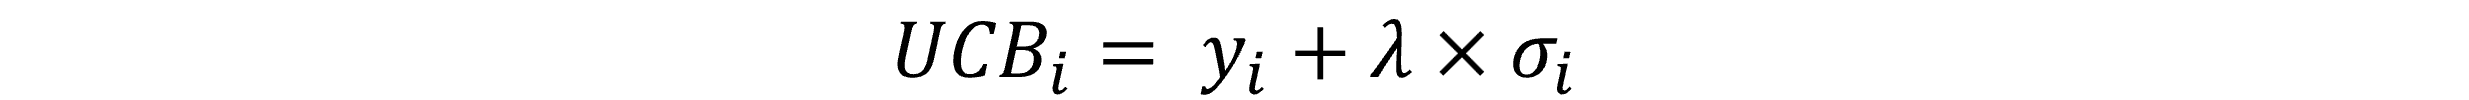

In [ ]:
# plot f(x) and known data points
plt.figure(figsize=(8,4))
plt.plot(x,y,label='f(x)',color='k')
plt.scatter(x_known,y_known,color='k')
plt.xlabel('x')
plt.ylabel('y')

# plot UCB with large lambda (favoring exploration)
lbda = 3
ucb = y_pred + lbda*sigma
plt.plot(x,ucb,color = 'brown',label = f'\u03bb = {lbda}',linestyle='dotted')
plt.scatter(x=ucb.argmax(),y=ucb.max(),color='red',facecolors='none')

# plot UCB with moderate lambda (middle ground)
lbda = 1
ucb = y_pred + lbda*sigma
plt.plot(x,ucb,color = 'darkgoldenrod',label = f'\u03bb = {lbda}',linestyle='dotted')
plt.scatter(x=ucb.argmax(),y=ucb.max(),color='red',facecolors='none')

# plot UCB with small lambda (favoring exploitation)
lbda = .2
ucb = y_pred + lbda*sigma
plt.plot(x,ucb,color = 'gold',label = f'\u03bb = {lbda}',linestyle='dotted')
plt.scatter(x=ucb.argmax(),y=ucb.max(),color='red',facecolors='none')

plt.legend()
plt.show()

#### Probability of Improvement (PI)

Probability distribution function:

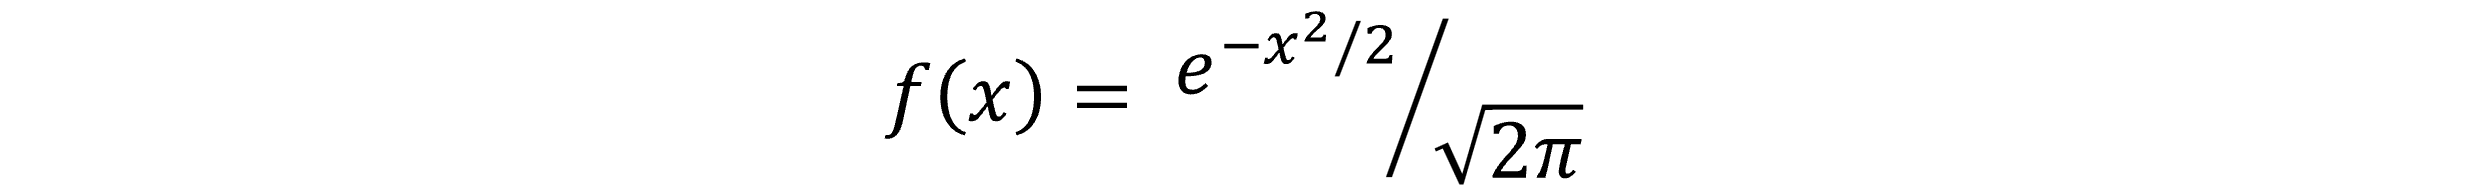

In [ ]:
# generate probability density
x_p = np.linspace(-3,3,100)
y_p = [np.exp(-(xp**2)/2)/(2*pi)**(1/2) for xp in x_p]

# plot probability density function
plt.figure(figsize=(8,4))
plt.plot(x_p,y_p,label='Prob. Dens.',color='k')

# plot cumulative distribution function
plt.plot(x_p,norm.cdf(x_p),label='Cum. Dist',color='gray',linestyle='dashed')
plt.xlabel('\u03C3')
plt.ylabel('Probability')
plt.legend()
plt.show()

z-score and Probability of Improvement:

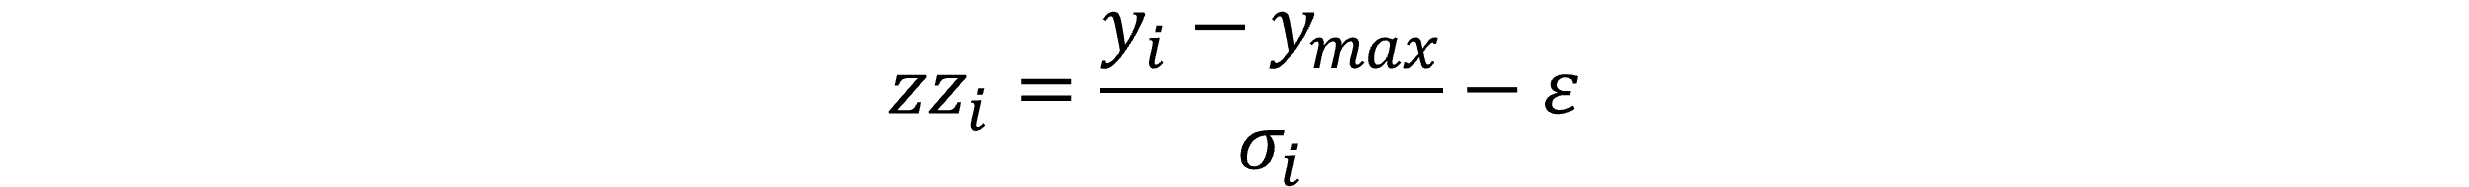

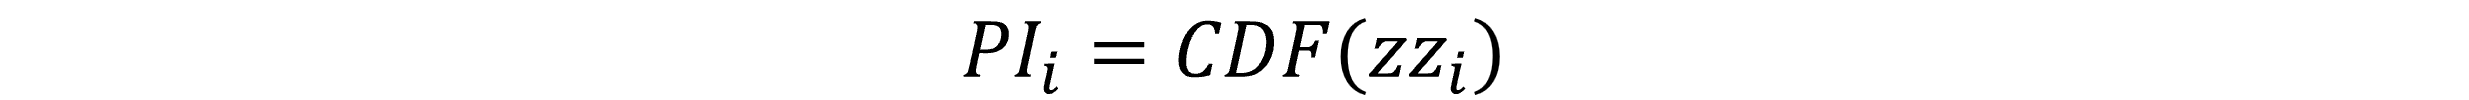

In [ ]:
# plot f(x) and known data points
plt.figure(figsize=(8,4))
plt.plot(x,y,label='f(x)',color='k')
plt.plot(x,y_pred, color = 'red', label = 'Post', linestyle = '--')
plt.fill_between(x,y_pred - sigma, y_pred + sigma, alpha = 0.1, color = 'red')
plt.scatter(x_known,y_known,color='k')
plt.xlabel('x')
plt.ylabel('y')
ax2 = plt.twinx()

# determine the GPR best predicted value from the training set
y_best = gp.predict(x_known.reshape(-1,1)).max()

def PoI(y_pred,sigma,y_best,epsilon,scale,loc):
    PI = np.empty(y_pred.size,dtype=float)
    for i in range(0,y_pred.size):
        if sigma[i] > 1e-4:
            zz = (y_pred[i]-y_best-epsilon)/sigma[i]
            PI[i] = norm.cdf(zz)
        else:
            PI[i] = 0.0     
    return PI

# plot PI with large epsilon value (favoring exploration)
epsilon = 5
zz = (y_pred-y_best-epsilon)/sigma
PI = PoI(y_pred,sigma,y_best,epsilon,scale=zz.std(),loc=zz.mean())
PI = PI/PI.max() # scale for visibility
ax2.plot(x,PI,color='navy',linestyle='dotted',label=f'\u03b5 = {epsilon}')
ax2.scatter(PI.argmax(),PI.max(),color='r',facecolors='none')

# plot PI with moderate epsilon value (middle ground)
epsilon = 1
zz = (y_pred-y_best-epsilon)/sigma
PI = PoI(y_pred,sigma,y_best,epsilon,scale=zz.std(),loc=zz.mean())
PI = PI/PI.max() # scale for visibility
ax2.plot(x,PI,color='blue',linestyle='dotted',label=f'\u03b5 = {epsilon}')
ax2.scatter(PI.argmax(),PI.max(),color='r',facecolors='none')

# plot PI with small epsilon value (favoring exploitation)
epsilon = 0
zz = (y_pred-y_best-epsilon)/sigma
PI = PoI(y_pred,sigma,y_best,epsilon,scale=zz.std(),loc=zz.mean())
PI = PI/PI.max() # scale for visibilty
ax2.plot(x,PI,color='skyblue',linestyle='dotted',label=f'\u03b5 = {epsilon}')
ax2.scatter(PI.argmax(),PI.max(),color='r',facecolors='none')
ax2.set_ylabel('Prob. Imp. (scaled)')
ax2.set_ylim(0,PI.max()*1.2)

plt.legend(loc='lower left')
plt.show()

#### Expected Improvement (ExpI)

z-score and Expected Improvement

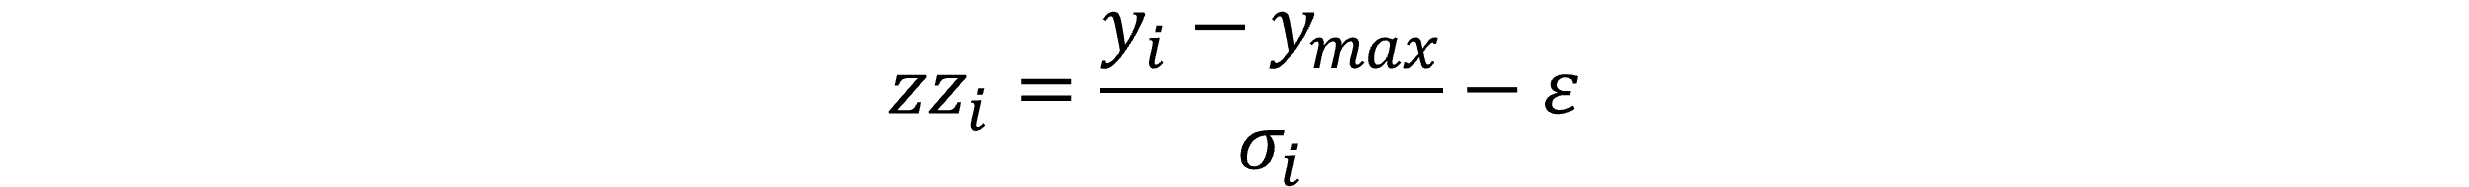

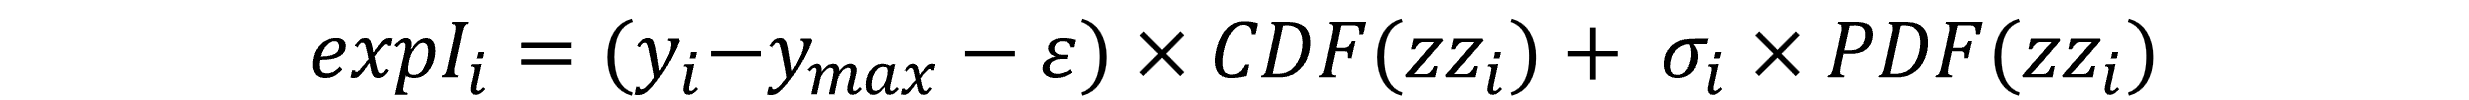

In [ ]:
# plot f(x) and known data points
plt.figure(figsize=(8,4))
plt.plot(x,y,label='f(x)',color='k')
plt.plot(x,y_pred, color = 'red', label = 'Post', linestyle = '--')
plt.fill_between(x,y_pred - sigma, y_pred + sigma, alpha = 0.1, color = 'red')
plt.scatter(x_known,y_known,color='k')
plt.xlabel('x')
plt.ylabel('y')


# determine the GPR best predicted value from the training set
y_best = gp.predict(x_known.reshape(-1,1)).max()

def expI(y_pred,sigma,y_best,epsilon):
    EI = np.empty(y_pred.size,dtype=float)
    for i in range(0,y_pred.size):
        if sigma[i] > 1e-4:
            zz = (y_pred[i]-y_best-epsilon)/sigma[i]
            EI[i] = (y_pred[i]-y_best-epsilon)*norm.cdf(zz,scale=1)+sigma[i]*norm.pdf(zz,scale=1)
        else:
            EI[i] = 0.0
    return EI

# plot PI with large epsilon value (favoring exploration)
epsilon = 2
ax2 = plt.twinx()
EI = expI(y_pred,sigma,y_best,epsilon)
EI = EI/EI.max() # scale for visibility
ax2.plot(x,EI,color='navy',linestyle='dotted',label=f'\u03b5 = {epsilon}')
ax2.scatter(EI.argmax(),EI.max(),color='r',facecolors='none')

# plot PI with moderate epsilon value (middle ground)
epsilon = .5
EI = expI(y_pred,sigma,y_best,epsilon)
EI = EI/EI.max() # scale for visibility
ax2.plot(x,EI,color='blue',linestyle='dotted',label=f'\u03b5 = {epsilon}')
ax2.scatter(EI.argmax(),EI.max(),color='r',facecolors='none')

# plot PI with small epsilon value (favoring exploitation)
epsilon = 0
EI = expI(y_pred,sigma,y_best,epsilon)
EI = EI/EI.max() # scale for visibility
ax2.plot(x,EI,color='skyblue',linestyle='dotted',label=f'\u03b5 = {epsilon}')
ax2.scatter(EI.argmax(),EI.max(),color='r',facecolors='none')
ax2.set_ylabel('Expected Imp. (scaled)')
ax2.set_ylim(0,EI.max()*1.2)

plt.legend(loc='lower left')
plt.show()

#### Iteratively add new data and retrain the model (active learning)

In [ ]:
# set how many loops to train
n_loops = 10
epsilon = .1

# set random seed
np.random.seed(7)

# reset the model to original conditions (in case you ran this cell already)
x_known2, y_known2 = x_known, y_known
gp.fit(x_known.reshape(-1,1),y_known)
y_pred,sigma = gp.predict(x.reshape(-1,1),return_std=True)

# set up the plotting
fig, ax = plt.subplots(3,1)
fig.set_figwidth(8)
fig.set_figheight(9)

# calculate initial RMSE
rmse = [np.sqrt((y_pred-y)**2).mean()]

# plot current GPR fit
ax[0].set_title(f'Model after {n_loops} Active Learning cycles')
ax[0].plot(x,y_pred, label = f'GPR 0', linestyle = '--',alpha=1)

# initialize list to track maximum y known
y_max = []

for loop in range(n_loops):
    
    # determine the most valuable point by expected improvement
    EI = expI(y_pred,sigma,y_best,epsilon)
    x_new = np.array([EI.argmax()])
    y_new = y[[EI.argmax()]]

    # add the new data point to the known data
    x_known2 = np.concatenate((x_known2,x_new))
    y_known2 = np.concatenate((y_known2,y_new))

    # re-train model on the new full data set and predict a new fit
    gp.fit(x_known2.reshape(-1,1),y_known2)
    y_pred,sigma = gp.predict(x.reshape(-1,1),return_std = True)

    # determine the GPR best predicted value from the new training set
    y_best = gp.predict(x_known2.reshape(-1,1)).max()

    # plot new GPR fit
    ax[0].plot(x,y_pred, label = f'GPR {loop+1}', linestyle = '--',alpha=1,zorder=loop)
    
    # calculate RMSE of model
    rmse.append(np.sqrt((y_pred-y)**2).mean())
    y_max.append(y_known2.max())
    
# plot f(x), the newest training point, and standard deviation for last model trained
ax[0].plot(x,y,color='k',zorder=0)
ax[0].scatter(x_known2,y_known2,color='k')
ax[0].fill_between(x,y_pred - sigma, y_pred + sigma, alpha = 0.1, color = 'red',zorder=0)
#ax[0].legend(loc='lower right')
if n_loops>0:
    ax[0].scatter(x_new,y_new,color='r',zorder=10)

#determine the most valuable point for the new model by expected improvement
EI = expI(y_pred,sigma,y_best,epsilon)

# plot the expected improvement graph highlighting the next training point
ax[1].bar(x,EI,color='black')
ax[1].scatter(EI.argmax(),EI.max(),color='red',facecolors='none',label='Best')
ax[1].set_ylabel('Exp. Impr.')
ax[1].set_xlabel('x')
ax[1].legend()

# plot the RMSE
ax[2].scatter(range(len(rmse)),rmse,color='k')
ax[2].plot(rmse,color='k')
ax[2].set_ylabel('RMSE')
ax[2].set_xlabel('Cycle')
ax[2].set_xlim(-0.1,len(rmse)-0.9)
ax[2].text(x=.9,y=0.8,s=f'RMSE = {round(rmse[-1],3)}',transform=ax[2].transAxes,ha='right')

# plot y max
ax1 = plt.twinx()
ax1.scatter(range(len(y_max)),y_max,color='r')
ax1.plot(y_max,color='r')
ax1.set_ylabel('Maximum Y Found') 

plt.tight_layout()
plt.show()